In [1]:
# !pip install pycaret
# !pip install shap
# # !pip install graphviz
# # !pip install dtreeviz

ERROR: pandas-profiling 2.10.0 requires htmlmin>=0.1.12, which is not installed.
ERROR: pandas-profiling 2.10.0 requires phik>=0.10.0, which is not installed.
ERROR: pandas-profiling 2.10.0 requires tangled-up-in-unicode>=0.0.6, which is not installed.
ERROR: pandas-profiling 2.10.0 requires visions[type_image_path]==0.6.0, which is not installed.
ERROR: pynndescent 0.5.1 has requirement numba>=0.51.2, but you'll have numba 0.50.1 which is incompatible.



  Using cached pycaret-2.2.3-py3-none-any.whl (249 kB)
  Using cached spacy-2.3.5-cp38-cp38-win_amd64.whl (9.7 MB)
Processing c:\users\danieldabdub\appdata\local\pip\cache\wheels\65\12\35\bfcdbe79e089f9c294c7d0e2e63e06d1cdec98e5cf60c9cdd6\umap_learn-0.5.0-py3-none-any.whl
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
Processing c:\users\danieldabdub\appdata\local\pip\cache\wheels\94\9b\33\a245c7f9156010196e279d3bac735a47e65f1effb4157df186\pyod-0.8.6-py3-none-any.whl
  Using cached mlxtend-0.18.0-py2.py3-none-any.whl (1.3 MB)
  Using cached catboost-0.24.4-cp38-none-win_amd64.whl (65.4 MB)
Processing c:\users\danieldabdub\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866\cufflinks-0.17.3-py3-none-any.whl
Processing c:\users\danieldabdub\appdata\local\pip\cache\wheels\31\8c\a0\24a443892f2134e691d59c8c6c35e19821e02f85e49871f8fd\pyldavis-2.1.2-py2.py3-none-any.whl
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cach

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

# from sklearn import datasets
# from sklearn.tree import DecisionTreeClassifier 
# from sklearn import tree
# from sklearn.tree import export_graphviz
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# import graphviz
# from dtreeviz.trees import *
# import seaborn as sns
# import statsmodels.api as sm
# import scipy.stats as stats

## Functions

In [2]:
def plot_var_vs_target(df, var_analyze, var_target, show_num=20, size_h=14, size_e=6):

    df_plot = (df.groupby([var_analyze, var_target])
                              .size().reset_index().pivot(columns=var_target, index=var_analyze, values=0))
    df_plot = df_plot.fillna(0)
    df_plot.plot(kind='bar',  stacked=True, figsize=(size_h,size_e));

    
def plot_var_vs_target_normalized(df, var_analyze, var_target, show_num=20, size_h=14, size_e=6):
    
    df_plot = (df.groupby([var_analyze, var_target])
                              .size().reset_index().pivot(columns=var_target, index=var_analyze, values=0))

    df_plot = df_plot.fillna(0)
    
    cols = df_plot.columns.tolist()
    df_plot['total'] = 0
    for col in cols:
        df_plot['total'] = df_plot['total']+ df_plot[col]
    
    cols = df_plot.columns.tolist()[:-1]
    
    for col in cols:
        df_plot[col] = df_plot[col] / df_plot['total']
        
    df_plot = df_plot.drop(columns=['total'])

    df_plot.plot(kind='bar', stacked=True, figsize=(size_h,size_e));

# Initial analysis

In [3]:
df_transactions=pd.read_csv('./../datasets/final_transactions_dataset.csv', index_col=0)

df_transactions

,company,sector,horizon (days),amount,date_BUY_fix,date_SELL_fix,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,...,investment,ESG_ranking,PE_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio,EPS_ratio
0,TSLA,AUTO,7,500,2017-06-14,2017-06-21,76.132004,75.279999,0.336212,0.336167,...,BAD,31.1,0.00,5.65,9.71,-7.60,0.97,-3.54,-15.13,-0.94
1,SC,BANK,600,3000,2018-07-09,2020-02-28,17.611959,23.415619,0.291036,0.247294,...,BAD,26.9,4.65,0.87,0.89,18.62,0.87,3.38,20.59,3.75
2,DB,BANK,330,5000,2014-04-03,2015-02-27,39.276001,30.680777,0.261244,0.260936,...,BAD,30.0,599.56,0.79,0.56,0.34,0.73,0.01,0.25,0.07
3,AMZN,TECH,90,15000,2015-01-09,2015-04-09,296.929993,383.540009,0.329601,0.324660,...,GOOD,27.4,0.00,1.62,13.44,-0.27,1.12,-0.57,-2.29,-0.54
5,BBY,RETAIL,30,50,2016-06-30,2016-07-29,27.180000,29.844707,0.349990,0.348505,...,GOOD,12.0,9.65,0.25,2.06,2.53,1.47,7.23,22.06,2.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,MSFT,TECH,30,4000,2015-12-10,2016-01-08,50.435631,47.752792,0.281871,0.281726,...,BAD,14.7,36.29,4.70,5.24,13.29,3.00,6.65,14.44,1.40
199995,KSS,RETAIL,60,50,2015-05-08,2015-07-07,58.212013,51.271896,0.226325,0.263863,...,BAD,12.9,13.03,0.60,1.88,4.56,1.91,6.01,14.72,4.29
199997,AAPL,TECH,90,100,2016-04-14,2016-07-13,26.105249,22.695921,0.275282,0.281343,...,BAD,16.5,11.29,2.53,4.26,22.27,1.28,17.44,40.24,2.25
199998,DB,BANK,540,1000,2015-08-10,2017-01-31,32.734558,19.146446,0.292055,0.517937,...,BAD,30.0,26.28,0.74,0.48,3.49,0.71,0.09,2.09,1.12


In [4]:
df_transactions_extra=df_transactions.copy()

In [5]:
df_transactions.columns

Index(['company', 'sector', 'horizon (days)', 'amount', 'date_BUY_fix',
       'date_SELL_fix', 'price_BUY', 'price_SELL', 'Volatility_Buy',
       'Volatility_sell', 'Sharpe Ratio', 'expected_return (yearly)',
       'inflation', 'nominal_return', 'investment', 'ESG_ranking', 'PE_ratio',
       'PS_ratio', 'PB_ratio', 'NetProfitMargin_ratio', 'current_ratio',
       'roa_ratio', 'roe_ratio', 'EPS_ratio'],
      dtype='object')

In [6]:
good_bad=df_transactions.investment.value_counts()
print('Bad investments :',good_bad[0]/df_transactions.shape[0] , '%' )
print('Good investments :',good_bad[1]/df_transactions.shape[0] , '%' )
df_transactions.investment.value_counts()

Bad investments : 0.6297051229786655 %
Good investments : 0.3702948770213344 %


BAD     101948
GOOD     59950
Name: investment, dtype: int64

In [7]:
df_transactions['profit']=df_transactions['nominal_return']*df_transactions['amount']

In [8]:
total_profits=df_transactions['profit'].sum()
total_invested=df_transactions['amount'].sum()

print(total_profits)
print(total_invested)

143947858.5029618
1319744300


In [9]:
print(total_profits/total_invested)

0.10907253662922568


In [10]:
df_transactions['nominal_return'].mean()

0.11031858598911637

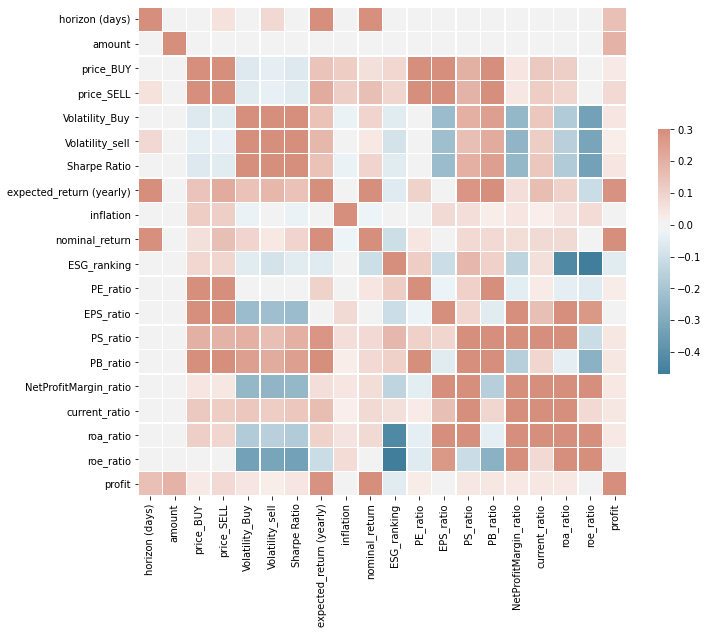

In [13]:
# Compute the correlation matrix
corr=df_transactions.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
# Compute the correlation matrix
corr=df_transactions.corr()
corr.style.background_gradient(cmap='coolwarm')

,horizon (days),amount,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,Sharpe Ratio,expected_return (yearly),inflation,nominal_return,ESG_ranking,PE_ratio,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio,profit
horizon (days),1.000000,-0.002030,0.000162,0.055099,-0.000486,0.084652,-0.000486,0.556673,0.000637,0.291439,0.002692,0.003669,-0.001509,-0.000259,-0.000031,-0.001947,-0.000537,-0.001523,-0.000913,0.153130
amount,-0.002030,1.000000,0.000425,0.000600,-0.000120,0.000330,-0.000120,-0.001110,0.001318,0.000219,-0.000677,-0.000910,0.000399,-0.000404,-0.000904,0.000587,0.000611,-0.000404,0.000634,0.195197
price_BUY,0.000162,0.000425,1.000000,0.973569,-0.062016,-0.039753,-0.062016,0.145075,0.119388,0.061572,0.088392,0.347188,0.626923,0.198156,0.397671,0.050338,0.127692,0.107985,-0.005173,0.032866
price_SELL,0.055099,0.000600,0.973569,1.000000,-0.051911,-0.035139,-0.051911,0.215208,0.112187,0.156615,0.090379,0.355175,0.587814,0.189018,0.404770,0.039829,0.118913,0.093867,-0.013161,0.083295
Volatility_Buy,-0.000486,-0.000120,-0.062016,-0.051911,1.000000,0.852705,1.000000,0.147667,-0.028073,0.096839,-0.053567,0.015321,-0.233564,0.202416,0.249334,-0.249384,0.132009,-0.174418,-0.336224,0.050303
Volatility_sell,0.084652,0.000330,-0.039753,-0.035139,0.852705,1.000000,0.852705,0.177267,0.005472,0.038153,-0.084554,0.014359,-0.219637,0.157122,0.213715,-0.258395,0.119144,-0.154856,-0.319713,0.021013
Sharpe Ratio,-0.000486,-0.000120,-0.062016,-0.051911,1.000000,0.852705,1.000000,0.147667,-0.028073,0.096839,-0.053567,0.015321,-0.233564,0.202416,0.249334,-0.249384,0.132009,-0.174418,-0.336224,0.050303
expected_return (yearly),0.556673,-0.001110,0.145075,0.215208,0.147667,0.177267,0.147667,1.000000,-0.017545,0.544528,-0.056224,0.101735,0.011550,0.281466,0.343305,0.066708,0.159831,0.100882,-0.113197,0.287633
inflation,0.000637,0.001318,0.119388,0.112187,-0.028073,0.005472,-0.028073,-0.017545,1.000000,-0.019648,0.002660,-0.012094,0.080124,0.067225,0.021117,0.050553,0.019587,0.052811,0.071861,-0.010861
nominal_return,0.291439,0.000219,0.061572,0.156615,0.096839,0.038153,0.096839,0.544528,-0.019648,1.000000,-0.102833,0.048852,0.009122,0.083148,0.083333,0.071280,0.078795,0.075268,-0.000948,0.531260


## Analysis by sector 

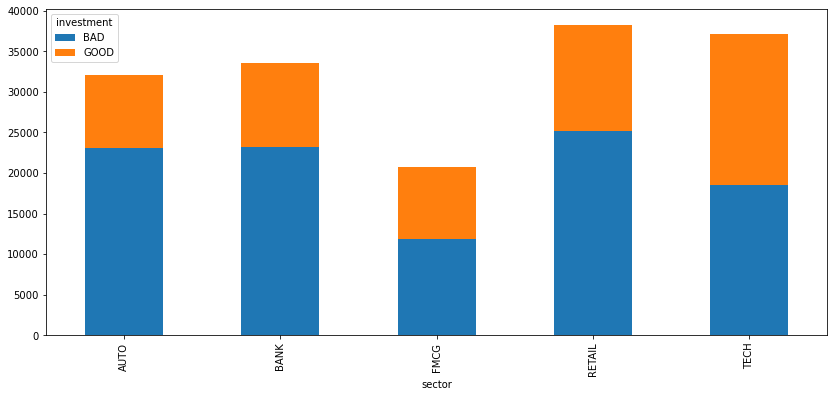

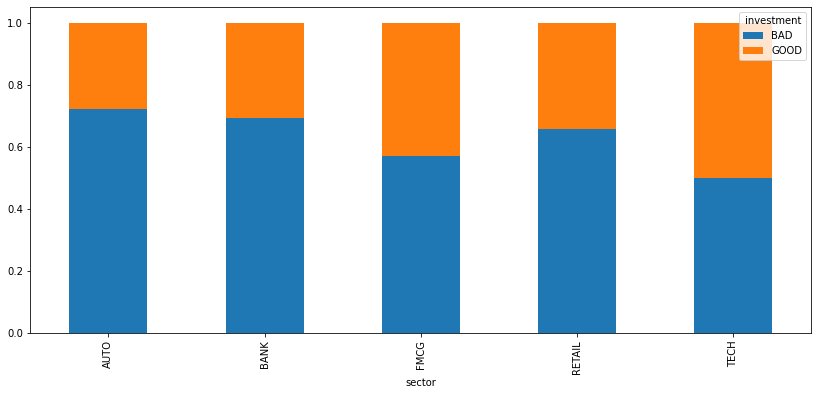

In [11]:
plot_var_vs_target(df_transactions, 'sector', 'investment')
plot_var_vs_target_normalized(df_transactions, 'sector', 'investment')

In [12]:
df_transactions.groupby(['sector', 'investment']).count()

company  horizon (days)  amount  date_BUY_fix  \
sector investment                                                  
AUTO   BAD           23114           23114   23114         23114   
       GOOD           8935            8935    8935          8935   
BANK   BAD           23241           23241   23241         23241   
       GOOD          10375           10375   10375         10375   
FMCG   BAD           11880           11880   11880         11880   
       GOOD           8893            8893    8893          8893   
RETAIL BAD           25175           25175   25175         25175   
       GOOD          13134           13134   13134         13134   
TECH   BAD           18538           18538   18538         18538   
       GOOD          18613           18613   18613         18613   

                   date_SELL_fix  price_BUY  price_SELL  Volatility_Buy  \
sector investment                                                         
AUTO   BAD                 23114      23114       23114           23114   
       GOOD                 8935       8935        8935            8935   
BANK   BAD                 23241      23241       23241           23241   
       GOOD                10375      10375       10375           10375   
FMCG   BAD                 11880      11880       11880           11880   
       GOOD                 8893       8893        8893            8893   
RETAIL BAD                 25175      25175       25175           25175   
       GOOD                13134      13134       13134           13134   
TECH   BAD                 18538      18538       18538           18538   
       GOOD                18613      18613       18613           18613   

                   Volatility_sell  Sharpe Ratio  ...  ESG_ranking  PE_ratio  \
sector investment                                 ...                          
AUTO   BAD                   23114         23114  ...        23114     23114   
       GOOD                   8935          8935  ...         8935      8935   
BANK   BAD                   23241         23241  ...        23241     23241   
       GOOD                  10375         10375  ...        10375     10375   
FMCG   BAD                   11880         11880  ...        11880     11880   
       GOOD                   8893          8893  ...         8893      8893   
RETAIL BAD                   25175         25175  ...        25175     25175   
       GOOD                  13134         13134  ...        13134     13134   
TECH   BAD                   18538         18538  ...        18538     18538   
       GOOD                  18613         18613  ...        18613     18613   

                   PS_ratio  PB_ratio  NetProfitMargin_ratio  current_ratio  \
sector investment                                                             
AUTO   BAD            23114     23114                  23114          23114   
       GOOD            8935      8935                   8935           8935   
BANK   BAD            23241     23241                  23241          23241   
       GOOD           10375     10375                  10375          10375   
FMCG   BAD            11880     11880                  11880          11880   
       GOOD            8893      8893                   8893           8893   
RETAIL BAD            25175     25175                  25175          25175   
       GOOD           13134     13134                  13134          13134   
TECH   BAD            18538     18538                  18538          18538   
       GOOD           18613     18613                  18613          18613   

                   roa_ratio  roe_ratio  EPS_ratio  profit  
sector investment                                           
AUTO   BAD             23114      23114      23114   23114  
       GOOD             8935       8935       8935    8935  
BANK   BAD             23241      23241      23241   23241  
       GOOD            10375      10375      10375   10375  
FMCG   BAD             11

In [17]:
sectors=['AUTO', 'BANK','FMCG','RETAIL','TECH']
l_good_rates=list()
for sector in sectors:
    bad=df_transactions.groupby(['sector', 'investment']).count().loc[sector,'company'][0]
    good=df_transactions.groupby(['sector', 'investment']).count().loc[sector,'company'][1]
    total=bad+good
    good_rate=good/total
    l_good_rates.append(good_rate)
    print('____________________________________________')
    
    print('Industry Sector:', sector)
    
    print('Good investments: ', good_rate, ' %')
    
max_value = max(l_good_rates)
max_index = l_good_rates.index(max_value)

min_value = min(l_good_rates)
min_index = l_good_rates.index(min_value)
print('............................................')
print('Best sector ',sectors[max_index], 'with an overall % of ', max_value )
print('Worst sector ',sectors[min_index], 'with an overall % of ', min_value )

____________________________________________
Industry Sector: AUTO
Good investments:  0.28261686457237334  %
____________________________________________
Industry Sector: BANK
Good investments:  0.2969076300482556  %
____________________________________________
Industry Sector: FMCG
Good investments:  0.37995961150110585  %
____________________________________________
Industry Sector: RETAIL
Good investments:  0.3362764752931889  %
____________________________________________
Industry Sector: TECH
Good investments:  0.44329606822436984  %
............................................
Best sector  TECH with an overall % of  0.44329606822436984
Worst sector  AUTO with an overall % of  0.28261686457237334


We can see that we got a greater rate of good investments when investing in the TECH industry

## Analysis by company 

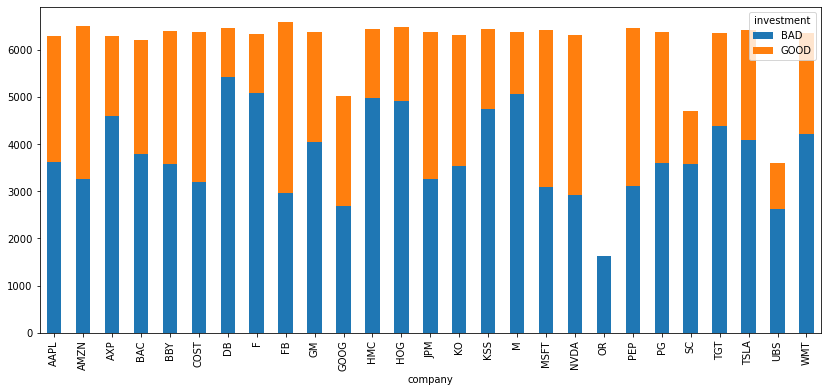

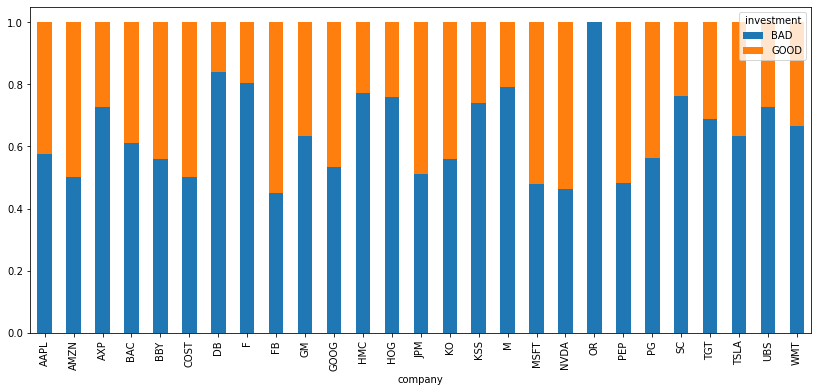

In [13]:
plot_var_vs_target(df_transactions, 'company', 'investment')
plot_var_vs_target_normalized(df_transactions, 'company', 'investment')

In [19]:
df_transactions.groupby(['company', 'investment']).count()

sector  horizon (days)  amount  date_BUY_fix  \
company investment                                                 
AAPL    BAD           9714            9714    9714          9714   
        GOOD          6165            6165    6165          6165   
AMZN    BAD           9077            9077    9077          9077   
        GOOD          7193            7193    7193          7193   
AXP     BAD          11537           11537   11537         11537   
        GOOD          4418            4418    4418          4418   
BAC     BAD          10322           10322   10322         10322   
        GOOD          5779            5779    5779          5779   
BBY     BAD           9582            9582    9582          9582   
        GOOD          6432            6432    6432          6432   
COST    BAD           8926            8926    8926          8926   
        GOOD          7062            7062    7062          7062   
DB      BAD          12938           12938   12938         12938   
        GOOD          3034            3034    3034          3034   
F       BAD          12318           12318   12318         12318   
        GOOD          3755            3755    3755          3755   
FB      BAD           8440            8440    8440          8440   
        GOOD          7613            7613    7613          7613   
GM      BAD          10448           10448   10448         10448   
        GOOD          5437            5437    5437          5437   
GOOG    BAD           7191            7191    7191          7191   
        GOOD          5084            5084    5084          5084   
HMC     BAD          12135           12135   12135         12135   
        GOOD          3958            3958    3958          3958   
HOG     BAD          11854           11854   11854         11854   
        GOOD          4025            4025    4025          4025   
JPM     BAD           9077            9077    9077          9077   
        GOOD          6831            6831    6831          6831   
KO      BAD           9734            9734    9734          9734   
        GOOD          6297            6297    6297          6297   
KSS     BAD          11707           11707   11707         11707   
        GOOD          4389            4389    4389          4389   
M       BAD          12158           12158   12158         12158   
        GOOD          4003            4003    4003          4003   
MSFT    BAD           8745            8745    8745          8745   
        GOOD          7238            7238    7238          7238   
NVDA    BAD           8273            8273    8273          8273   
        GOOD          7668            7668    7668          7668   
OR      BAD           4031            4031    4031          4031   
PEP     BAD           8716            8716    8716          8716   
        GOOD          7114            7114    7114          7114   
PG      BAD           9758            9758    9758          9758   
        GOOD          6345            6345    6345          6345   
SC      BAD           8836            8836    8836          8836   
        GOOD          2983            2983    2983          2983   
TGT     BAD          10817           10817   10817         10817   
        GOOD          5164            5164    5164          5164   
TSLA    BAD          10518           10518   10518         10518   
        GOOD          5388            5388    5388          5388   
UBS     BAD           6882            6882    6882          6882   
        GOOD          2120            2120    2120          2120   
WMT     BAD          10706           10706   10706         10706   
        GOOD          5323            5323    5323          5323   

                    date_SELL_fix  price_BUY  price_SELL  Volatility_Buy  \
company investment                                                         
AAPL    BAD                  9714       9714        9714            9714   
        GOOD                 6165       6165       

In [14]:
companies=df_transactions.company.unique()

In [21]:

l_good_rates=list()
for company in companies:
    bad=df_transactions.groupby(['company', 'investment']).count().loc[company,'sector'][0]
    try:
        good=df_transactions.groupby(['company', 'investment']).count().loc[company,'sector'][1]
    except:
        good=0
    total=bad+good
    good_rate=good/total
    l_good_rates.append(good_rate)
    print('____________________________________________')
    
    print('Company :', company)
    
    print('Good investments: ', good_rate, ' %')
    
max_value = max(l_good_rates)
max_index = l_good_rates.index(max_value)

min_value = min(l_good_rates)
min_index = l_good_rates.index(min_value)
print('............................................')
print('Best company ',companies[max_index], 'with an overall % of ', max_value )
print('Worst company ',companies[min_index], 'with an overall % of ', min_value )

____________________________________________
Company : BBY
Good investments:  0.4016485575121768  %
____________________________________________
Company : BAC
Good investments:  0.35892180609900004  %
____________________________________________
Company : AXP
Good investments:  0.2769037919147603  %
____________________________________________
Company : KSS
Good investments:  0.2726764413518887  %
____________________________________________
Company : JPM
Good investments:  0.4294065878803118  %
____________________________________________
Company : PEP
Good investments:  0.44939987365761214  %
____________________________________________
Company : FB
Good investments:  0.4742415747835296  %
____________________________________________
Company : UBS
Good investments:  0.23550322150633193  %
____________________________________________
Company : DB
Good investments:  0.18995742549461558  %
____________________________________________
Company : SC
Good investments:  0.252390219138675  %


## Analysis by horizon

In [15]:
horizon_bins=list(range(1,720,30))
df_transactions_extra['horizon_discretized'] = (pd.cut(x=df_transactions_extra['horizon (days)'],bins=horizon_bins))

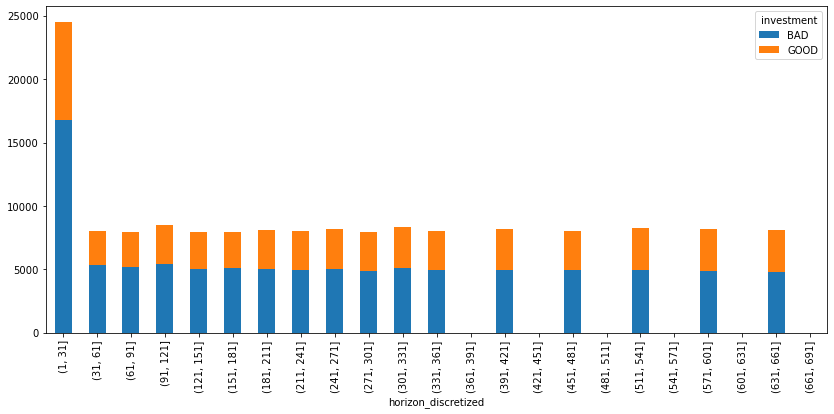

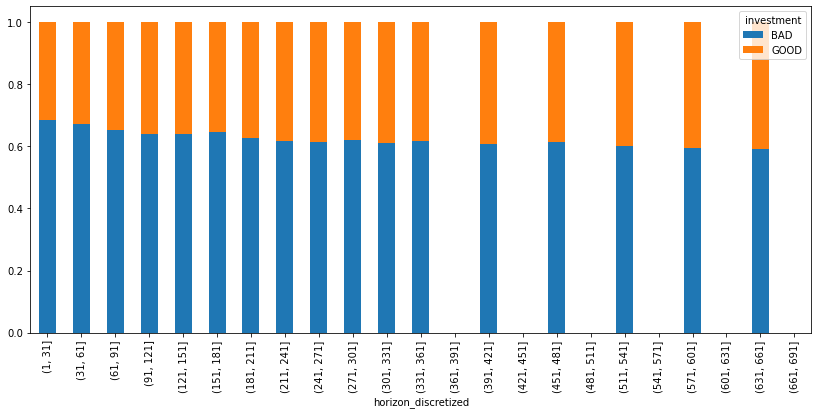

In [16]:
plot_var_vs_target(df_transactions_extra, 'horizon_discretized', 'investment')
plot_var_vs_target_normalized(df_transactions_extra, 'horizon_discretized', 'investment')

Here we can appreciate a tendency of getting more GOOD investments as the horizon of investment is greater

# ML models 

We are going to do models of different years

In [28]:
df_transactions.info()
df_transactions['date_BUY_fix'] = pd.to_datetime(df_transactions['date_BUY_fix'])
df_transactions['date_SELL_fix'] = pd.to_datetime(df_transactions['date_SELL_fix'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405258 entries, 0 to 499999
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   company                   405258 non-null  object        
 1   sector                    405258 non-null  object        
 2   horizon (days)            405258 non-null  int64         
 3   amount                    405258 non-null  int64         
 4   date_BUY_fix              405258 non-null  datetime64[ns]
 5   date_SELL_fix             405258 non-null  datetime64[ns]
 6   price_BUY                 405258 non-null  float64       
 7   price_SELL                405258 non-null  float64       
 8   Volatility_Buy            405258 non-null  float64       
 9   Volatility_sell           405258 non-null  float64       
 10  Sharpe Ratio              405258 non-null  float64       
 11  expected_return (yearly)  405258 non-null  float64       
 12  in

In [33]:
df_short_transactions=df_transactions[df_transactions['horizon (days)']<180]

In [34]:
df_short_transactions.shape

(245360, 25)

In [38]:
sell_dates=df_short_transactions['date_SELL_fix'].tolist() 
sell_years=list()
for d in sell_dates:
    d_str=d.strftime('%Y/%m/%d')
    year_str=d_str[:4]
    sell_years.append(year_str)
    
df_short_transactions['year']=sell_years

<ipython-input-38-40b327ce83d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_short_transactions['year']=sell_years


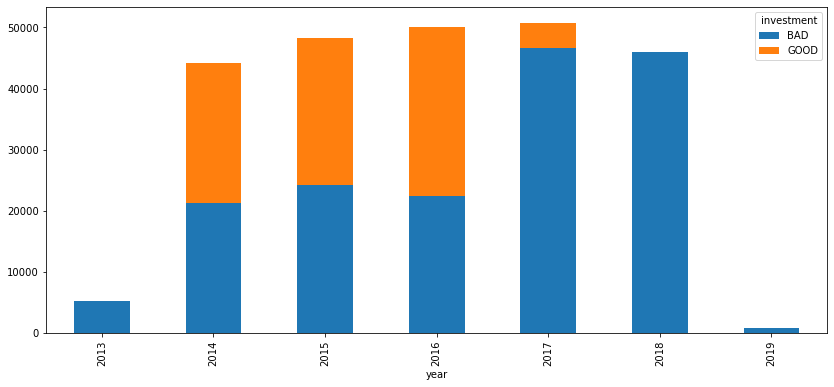

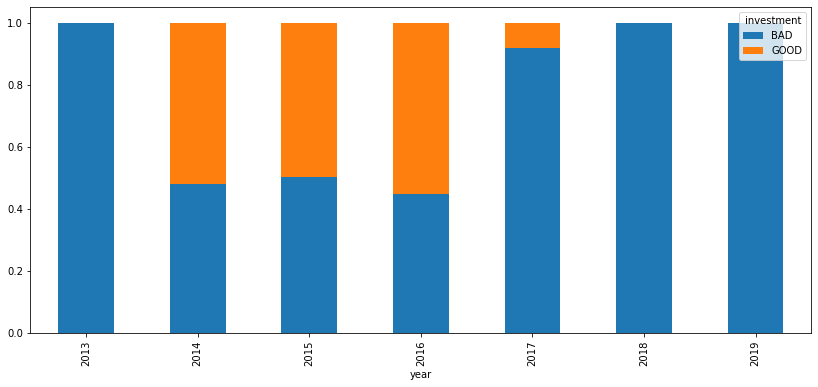

In [39]:
plot_var_vs_target(df_short_transactions, 'year', 'investment')
plot_var_vs_target_normalized(df_short_transactions, 'year', 'investment')

In [25]:
sell_date='2015-01-01'
sell_date = datetime.strptime(sell_date, '%Y-%m-%d')

mask= (df_transactions['date_SELL_fix'] <= sell_date)
df_year_transactions=df_transactions.loc[mask]

In [26]:
df_year_transactions.shape

(57199, 25)

In [27]:
# good_bad=df_year_transactions.investment.value_counts()
# print('Bad investments :',good_bad[0]/df_year_transactions.shape[0] , '%' )
# print('Good investments :',good_bad[1]/df_year_transactions.shape[0] , '%' )
df_year_transactions.investment.value_counts()

BAD     31385
GOOD    25814
Name: investment, dtype: int64

## PE Ratio

In [49]:
PE_ratio_bins=list(range(0,80,10))
df_transactions['PE_ratio_discretized'] = (pd.cut(x=df_transactions['PE_ratio'],bins=PE_ratio_bins))


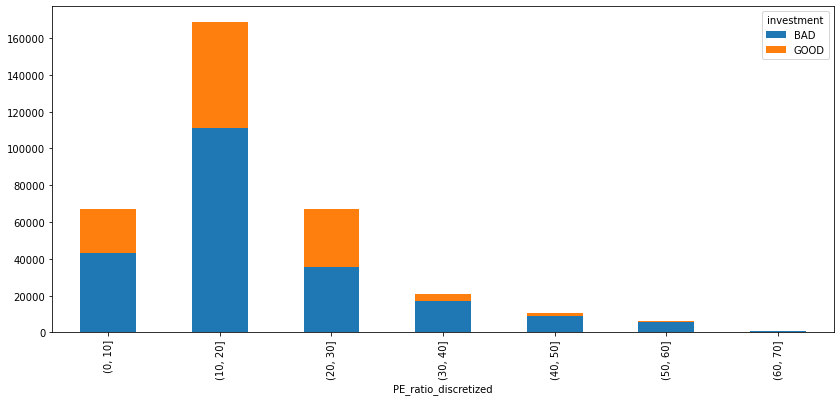

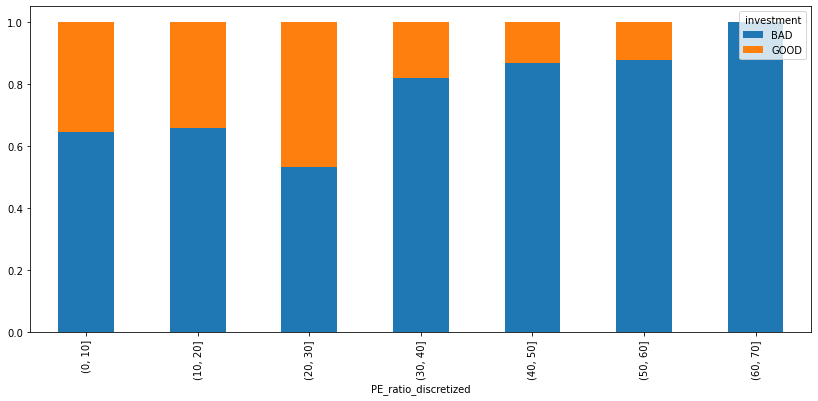

In [50]:
plot_var_vs_target(df_transactions, 'PE_ratio_discretized', 'investment')
plot_var_vs_target_normalized(df_transactions, 'PE_ratio_discretized', 'investment')

In [53]:
df_transactions['PE_ratio_discretized'].unique()

[(10.0, 20.0], (0.0, 10.0], (20.0, 30.0], NaN, (30.0, 40.0], (40.0, 50.0], (50.0, 60.0], (60.0, 70.0]]
Categories (7, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

In [54]:
df_transactions[(df_transactions['PE_ratio']<35)&(df_transactions['investment']=='GOOD')].shape

,company,sector,horizon (days),amount,date_BUY_fix,date_SELL_fix,price_BUY,price_SELL,Volatility_Buy,Volatility_sell,...,PE_ratio,EPS_ratio,PS_ratio,PB_ratio,NetProfitMargin_ratio,current_ratio,roa_ratio,roe_ratio,profit,PE_ratio_discretized
1,BAC,BANK,330,15000,2016-11-22,2017-10-18,18.616749,24.654472,0.322809,0.236350,...,11.39,1.26,1.71,0.54,15.70,0.92,0.67,5.54,4864.751308,"(10.0, 20.0]"
4,JPM,BANK,360,15000,2015-03-12,2016-03-07,51.869335,52.047966,0.194612,0.254011,...,9.38,5.46,1.87,0.81,19.91,0.99,0.81,8.91,51.657929,"(0.0, 10.0]"
5,PEP,FMCG,15,50000,2016-09-09,2016-09-23,91.770973,94.672684,0.137621,0.138286,...,21.03,4.56,2.27,10.83,10.74,1.32,9.29,54.98,1580.952238,"(20.0, 30.0]"
8,UBS,BANK,600,300,2016-02-26,2017-10-18,12.439063,15.383184,0.265057,0.233385,...,10.34,1.71,1.63,0.00,16.29,1.19,0.64,11.36,71.005059,"(10.0, 20.0]"
10,JPM,BANK,6,400,2016-02-10,2016-02-16,48.209927,50.667305,0.227931,0.245422,...,9.51,5.99,2.11,0.84,22.43,1.02,0.92,9.34,20.388983,"(0.0, 10.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499973,GM,AUTO,15,4000,2016-09-30,2016-10-14,27.490713,27.577246,0.243693,0.240144,...,3.15,8.73,0.32,0.92,10.15,0.93,6.71,32.48,12.590811,"(0.0, 10.0]"
499984,PG,FMCG,20,200,2016-02-02,2016-02-22,69.654259,71.312683,0.164108,0.166500,...,23.08,2.96,2.88,2.97,12.25,1.13,6.44,13.27,4.761875,"(20.0, 30.0]"
499991,TSLA,AUTO,15,15000,2015-05-15,2015-05-29,49.768002,50.160000,0.377146,0.374688,...,0.00,-0.64,6.70,28.88,-11.34,1.33,-7.11,-43.75,118.147689,NaN
499994,SC,BANK,300,50000,2016-03-10,2017-01-04,8.980955,12.931861,0.410470,0.535448,...,4.40,2.16,0.50,0.74,11.58,0.92,2.16,17.79,21996.022390,"(0.0, 10.0]"
